The neural network below is a simple one-layer model using the sigmoid activation function. This model is designed to classify images of handwritten digits (0-9), typically from the MNIST dataset. Each input image is 28x28 pixels, resulting in a 784-length input vector (28 * 28 = 784).

The output layer has 10 neurons, one for each digit from 0 to 9. The activation function used here is 'sigmoid', which indeed predicts values between 0 and 1. However, it's important to note that the sigmoid function is applied independently to each of the 10 output neurons. This means that each neuron will produce a probability-like value, representing the confidence that the input corresponds to that particular digit.

To determine the predicted digit, you would generally choose the neuron with the highest output value, which corresponds to the highest confidence.

The order of the neurons and their association with the digits is determined by the one-hot encoded labels used during the training process. As long as the labels are consistent, the model will learn to predict digits correctly:

- 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
- ...
- 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

The model will learn to associate the first neuron with the digit 0, the second neuron with the digit 1, and so on. The training process, which involves adjusting the weights and biases of the network, ensures that the model can map the input images to the corresponding one-hot encoded labels.

To be more specific, during the training process, the model will try to minimize the difference between its predictions and the one-hot encoded ground truth labels. So, if the first output neuron is not predicting 0 when it should, the loss function will indicate that the prediction is incorrect, and the training algorithm will update the model's weights and biases accordingly. Over many iterations, the model will learn to predict the correct digit for each input image.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

print("Numpy version:", np.__version__)
print("TensorFlow version:", tf.__version__)

Numpy version: 1.22.4
TensorFlow version: 2.12.0


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.shape

(60000, 28, 28)

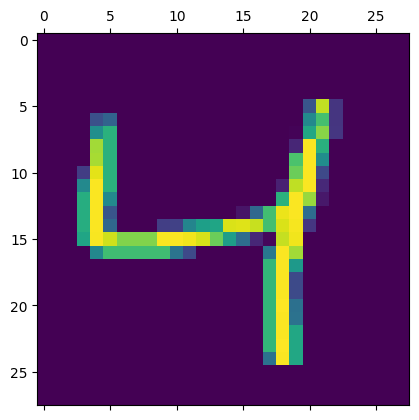

In [ ]:
plt.matshow(X_train[2])

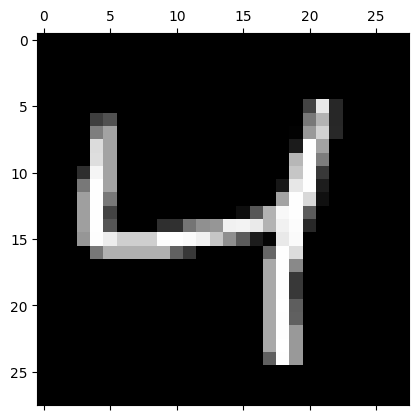

In [ ]:
plt.matshow(X_train[2], cmap='gray')
plt.show()

In [ ]:
y_train[2]

4

In [ ]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[2].shape

(28, 28)

In [ ]:
flat_shape = X_train[2].shape[0] * X_train[2].shape[1]
flat_shape

784

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), flat_shape)
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened = X_test.reshape(len(X_test), flat_shape)
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened[2].shape

(784,)

In [ ]:
X_train_flattened[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   

In [ ]:
print(np.where(X_train[2] == 232)) # (array([5]), array([21])) so 28*5 + 21 = 161
print(np.where(X_train_flattened[2] == 232))

(array([5]), array([21]))
(array([161]),)


- The neural network is a simple one-layer model using the sigmoid activation function. 
- This model is designed to classify images of handwritten digits (0-9), typically from the MNIST dataset. 
- Each input image is 28x28 pixels, resulting in a 784-length input vector (28 * 28 = 784).
- The output layer has 10 neurons, one for each digit from 0 to 9. 
- The activation function used here is 'sigmoid', which indeed predicts values between 0 and 1. 
  - However, it's important to note that the sigmoid function is applied independently to each of the 10 output neurons. 
  - This means that each neuron will produce a probability-like value, representing the confidence that the input corresponds to that particular digit.

- To determine the predicted digit, you would generally choose the neuron with the highest output value, which corresponds to the highest confidence.
  - This model is not ideal for multi-class classification. 
  - For such tasks, it is more common to use the softmax activation function in the output layer, which normalizes the outputs to sum up to 1, making them interpretable as probabilities. 
  - To use softmax in the Keras model, simply replace 'sigmoid' with 'softmax

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 9.7695 - accuracy: 0.8400
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0101 - accuracy: 0.8805
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6977 - accuracy: 0.8827
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5200 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


[0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 2.9208323e-23
 3.1830103e-03 9.9999875e-01 4.8393957e-15 1.0000000e+00 3.8332431e-04]


 Predicted: 1
 y_test: 1


AxesImage(size=(28, 28))


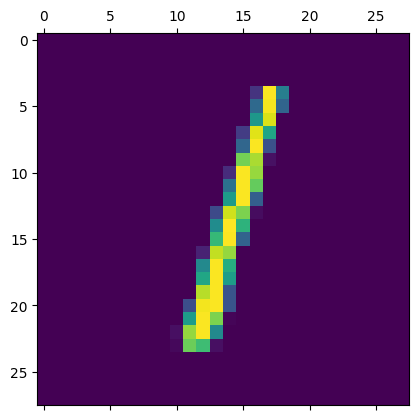

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)


model.fit(X_train_flattened, y_train, epochs=5)

model.evaluate(X_test_flattened, y_test)

y_predicted = model.predict(X_test_flattened)

print('\n')
print(y_predicted[2])
print('\n')
print(f" Predicted: {np.argmax(y_predicted[2])}")
print(f" y_test: {y_test[2]}")
print("\n")
print(plt.matshow(X_test[2]))

 digit counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


 Confusion Matrix: 
[[ 977    0    1    1    0    1    0    0    0    0]
 [   4 1123    6    1    0    1    0    0    0    0]
 [ 346  230  449    2    2    1    1    0    1    0]
 [ 139  132  542  195    1    0    0    1    0    0]
 [ 152   28  160  215  423    1    0    0    3    0]
 [ 342   35  248  169   44   52    2    0    0    0]
 [ 203   16  707   12    9    6    5    0    0    0]
 [  76   52  255  585   43   10    0    7    0    0]
 [ 161  148  532   91   18   21    1    0    2    0]
 [  78   32   96  630  164    4    0    5    0    0]]




Text(95.72222222222221, 0.5, 'Truth')

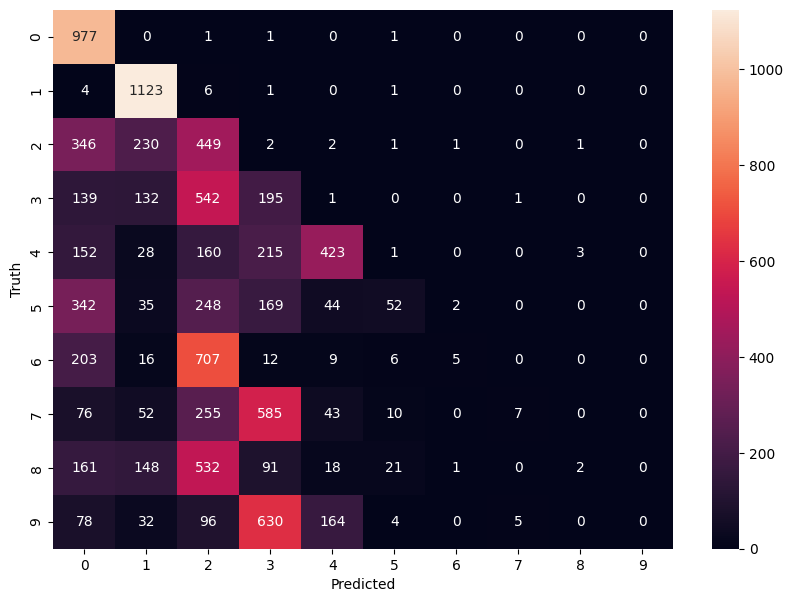

In [ ]:
# Count the occurrences of each digit in the test set
digit_counts = np.bincount(y_test)
print(f" digit counts: {digit_counts}")
print('\n')

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(f" Confusion Matrix: \n{cm}")

# the diagnals are correctly predicted
# for example 5 is predicted correctly 226 times
# Looking at row 0 in the matrix:
  # the digit 0 is correctly predicted 975 out of 980 times; 
  # it predicted 0 as a 2 (2 times)
  # 3 (1 time)
  # 4 (2 times) 
  # --> sum of row 0 = 980

print("\n")
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- The model above is not ideal for multi-class classification.
- For such tasks, it is more common to use the softmax activation function in the output layer, which normalizes the outputs to sum up to 1, making them interpretable as probabilities.
- To use softmax in the Keras model, simply replace 'sigmoid' with 'softmax

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)


model.fit(X_train_flattened, y_train, epochs=5)

model.evaluate(X_test_flattened, y_test)

y_predicted = model.predict(X_test_flattened)
print('\n')
print(y_predicted[2])
print('\n')
print(f" Predicted: {np.argmax(y_predicted[2])}")
print(f" y_test: {y_test[2]}")

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.9541 - accuracy: 0.8397
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1488 - accuracy: 0.8786
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8097 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5835 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


[0.0000000e+00 9.9999994e-01 1.7570382e-14 2.4777171e-29 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5823826e-29 0.0000000e+00]


 Predicted: 1
 y_test: 1


- Using X_train_flattened, X_test_flattened
  - sigmoid --> accuracy: 0.8952
  - softmax --> accuracy: 0.8854


- Let's scale the data and re-evaluate

In [ ]:
X_train_scaled = X_train.reshape(X_train.shape[0], X_train_flattened.shape[1]).astype('float32') / 255
X_test_scaled = X_test.reshape(X_test.shape[0], X_test_flattened.shape[1]).astype('float32') / 255

# Review the difference in flattened and scaled data
print(X_train_flattened[2])
print('\n')
print(X_train_scaled[2])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232
  39   0   0   0   0   0   0   0   0   0  62  81   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0   0   0
   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2
 153 210  40   0   0   0   0   0   0   0   0   0 220 163   0   0   0   0
   0   0   0   0   0   0   0   0   0  27 254 162   

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)


model.fit(X_train_scaled, y_train, epochs=5)

model.evaluate(X_test_scaled, y_test)

y_predicted = model.predict(X_test_scaled)
print('\n')
print(y_predicted[2])
print('\n')
print(f" Predicted: {np.argmax(y_predicted[2])}")
print(f" y_test: {y_test[2]}")

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4652 - accuracy: 0.8801
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9232
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


[3.42487154e-04 9.92956996e-01 6.59579694e-01 3.84885371e-01
 2.52893232e-02 1.22373626e-01 1.96598321e-01 1.25914171e-01
 3.97107512e-01 3.71290110e-02]


 Predicted: 1
 y_test: 1


 digit counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


 Confusion Matrix: 
[[ 961    0    0    2    0    5    7    2    3    0]
 [   0 1108    3    2    0    1    4    2   15    0]
 [   7    9  910   20   10    6   13   10   44    3]
 [   4    0   15  923    1   26    3    9   23    6]
 [   1    1    2    1  922    0   13    3   11   28]
 [   8    2    2   32   11  782   18    4   28    5]
 [  11    3    4    1    7   12  916    2    2    0]
 [   1    5   20   10    9    0    0  946    6   31]
 [   5    7    6   26    9   31    9    7  869    5]
 [  10    7    1   12   37    7    0   18   10  907]]




Text(95.72222222222221, 0.5, 'Truth')

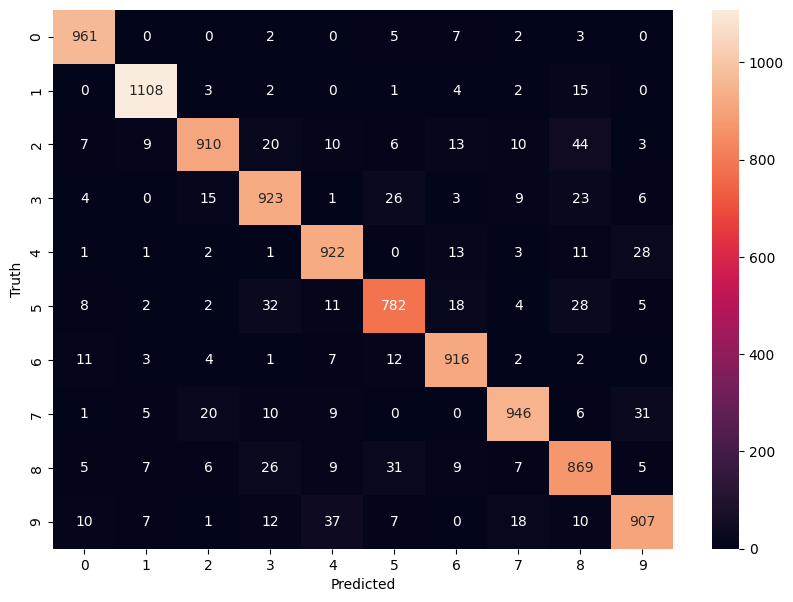

In [ ]:
# Count the occurrences of each digit in the test set
digit_counts = np.bincount(y_test)
print(f" digit counts: {digit_counts}")
print('\n')

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(f" Confusion Matrix: \n{cm}")

# the diagnals are correctly predicted
# for example 5 is predicted correctly 226 times
# Looking at row 0 in the matrix:
  # the digit 0 is correctly predicted 975 out of 980 times; 
  # it predicted 0 as a 2 (2 times)
  # 3 (1 time)
  # 4 (2 times) 
  # --> sum of row 0 = 980

print("\n")
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)


model.fit(X_train_scaled, y_train, epochs=5)

model.evaluate(X_test_scaled, y_test)

y_predicted = model.predict(X_test_scaled)
print('\n')
print(y_predicted[2])
print('\n')
print(f" Predicted: {np.argmax(y_predicted[2])}")
print(f" y_test: {y_test[2]}")

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4690 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


[2.3677139e-06 9.7451532e-01 1.5904527e-02 3.2753730e-03 1.4791857e-04
 6.4479222e-04 1.1823722e-03 8.6270762e-04 3.1533025e-03 3.1134384e-04]


 Predicted: 1
 y_test: 1


 digit counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


 Confusion Matrix: 
[[ 962    0    2    2    0    5    6    2    1    0]
 [   0 1118    3    2    0    1    4    2    5    0]
 [   3    7  950   12    7    4   11    8   25    5]
 [   2    0   28  911    1   29    2    9   19    9]
 [   1    1    9    0  910    0   10    3    8   40]
 [  10    3    8   28   11  780   10    7   29    6]
 [  14    3   10    1    8   10  909    2    1    0]
 [   1    8   27    4   10    0    0  940    1   37]
 [   7   11   10   19    9   36    8   11  851   12]
 [  10    7    1   10   24    5    0   14    7  931]]




Text(95.72222222222221, 0.5, 'Truth')

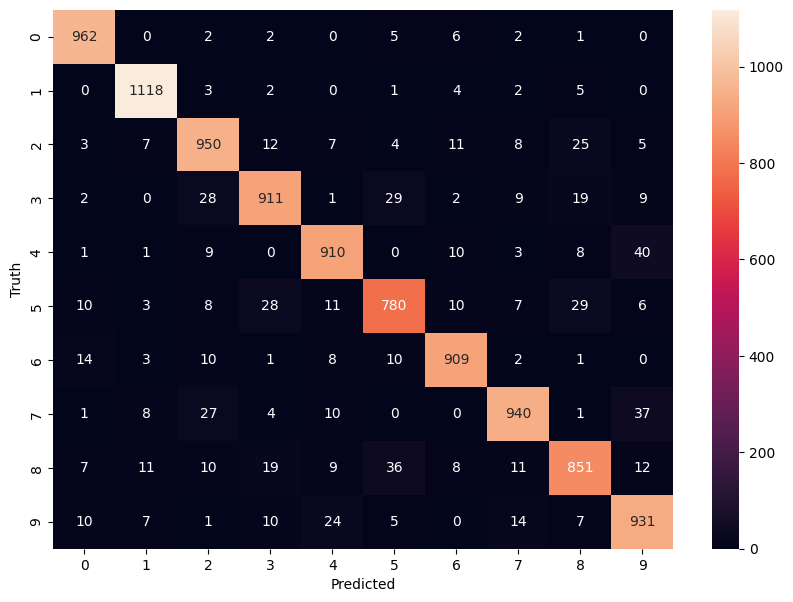

In [ ]:
# Count the occurrences of each digit in the test set
digit_counts = np.bincount(y_test)
print(f" digit counts: {digit_counts}")
print('\n')

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(f" Confusion Matrix: \n{cm}")

# the diagnals are correctly predicted
# for example 5 is predicted correctly 226 times
# Looking at row 0 in the matrix:
  # the digit 0 is correctly predicted 975 out of 980 times; 
  # it predicted 0 as a 2 (2 times)
  # 3 (1 time)
  # 4 (2 times) 
  # --> sum of row 0 = 980

print("\n")
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- Let's adding another hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))


loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")
print('\n')

y_predicted = model.predict(X_test_scaled)
print('\n')
print(y_predicted[2])
print('\n')
print(f" Predicted: {np.argmax(y_predicted[2])}")
print(f" y_test: {y_test[2]}")

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2552 - accuracy: 0.9270 - val_loss: 0.1308 - val_accuracy: 0.9615
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1113 - accuracy: 0.9674 - val_loss: 0.0926 - val_accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0757 - accuracy: 0.9775 - val_loss: 0.0790 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0782 - val_accuracy: 0.9756
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9760
Test loss: 0.07605841755867004, Test accuracy: 0.9760000109672546


313/313 [==============================] - 1s 2ms/step


[1.7835514e-04 9.9894553e-01 4.4198871e-02 9.8219365e-03 2.6784534e-02
 7.9071755e-03 1.3870541e-02 1.1122604e-01 4.3471962e-02 8.4513624e-04]


 Predicted: 1
 y_test: 1


 digit counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


 Confusion Matrix: 
[[ 968    0    1    1    1    0    4    1    2    2]
 [   0 1127    3    0    0    0    2    0    3    0]
 [   4    6 1003    5    3    0    2    5    4    0]
 [   0    2    6  988    0    2    0    4    3    5]
 [   0    0    2    0  957    0    6    1    1   15]
 [   4    0    0   11    2  866    6    1    1    1]
 [   3    3    0    1    4    3  944    0    0    0]
 [   0   10    9    7    1    0    0  993    0    8]
 [   4    1    3   11    6    4    7    4  930    4]
 [   1    6    0    7    7    1    0    3    0  984]]




Text(95.72222222222221, 0.5, 'Truth')

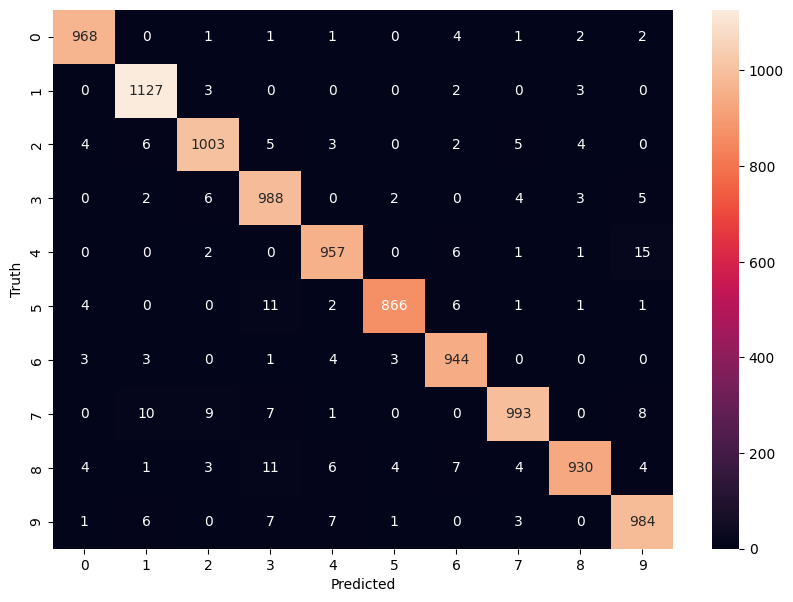

In [ ]:
# Count the occurrences of each digit in the test set
digit_counts = np.bincount(y_test)
print(f" digit counts: {digit_counts}")
print('\n')

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(f" Confusion Matrix: \n{cm}")

# the diagnals are correctly predicted
# for example 5 is predicted correctly 226 times
# Looking at row 0 in the matrix:
  # the digit 0 is correctly predicted 975 out of 980 times; 
  # it predicted 0 as a 2 (2 times)
  # 3 (1 time)
  # 4 (2 times) 
  # --> sum of row 0 = 980

print("\n")
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))


loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")
print('\n')

y_predicted = model.predict(X_test_scaled)
print('\n')
print(y_predicted[2])
print('\n')
print(f" Predicted: {np.argmax(y_predicted[2])}")
print(f" y_test: {y_test[2]}")

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2604 - accuracy: 0.9258 - val_loss: 0.1430 - val_accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1162 - accuracy: 0.9656 - val_loss: 0.1050 - val_accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0858 - val_accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0739 - val_accuracy: 0.9763
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9759
Test loss: 0.0815468579530716, Test accuracy: 0.9758999943733215


313/313 [==============================] - 1s 2ms/step


[8.9512866e-07 9.9930763e-01 1.1281105e-04 2.0878893e-05 2.9354072e-05
 4.5095421e-06 5.8590551e-05 1.5389106e-04 3.0970701e-04 1.7627145e-06]


 Predicted: 1
 y_test: 1


 digit counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


 Confusion Matrix: 
[[ 971    0    1    1    1    1    2    1    1    1]
 [   0 1124    2    1    0    1    3    0    4    0]
 [   7    1 1008    1    2    0    2    2    9    0]
 [   0    0    1  999    0    1    0    5    4    0]
 [   1    0    7    1  963    1    4    1    1    3]
 [   3    0    0   21    1  856    3    1    5    2]
 [   6    3    2    1    5    3  935    0    3    0]
 [   1    5   10   13    2    0    0  989    4    4]
 [   0    0    4    5    5    1    1    3  951    4]
 [   2    5    0    9   15    4    0    5    6  963]]




Text(95.72222222222221, 0.5, 'Truth')

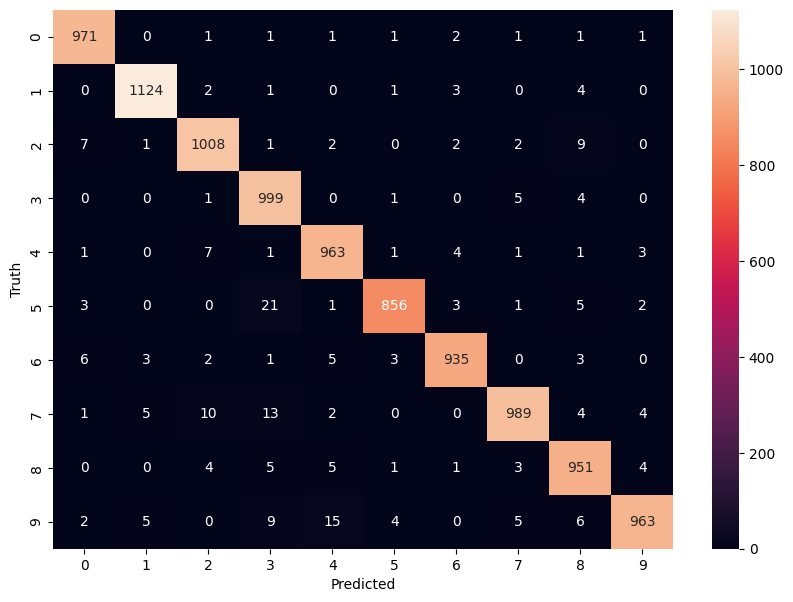

In [ ]:
# Count the occurrences of each digit in the test set
digit_counts = np.bincount(y_test)
print(f" digit counts: {digit_counts}")
print('\n')

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(f" Confusion Matrix: \n{cm}")

# the diagnals are correctly predicted
# for example 5 is predicted correctly 226 times
# Looking at row 0 in the matrix:
  # the digit 0 is correctly predicted 975 out of 980 times; 
  # it predicted 0 as a 2 (2 times)
  # 3 (1 time)
  # 4 (2 times) 
  # --> sum of row 0 = 980

print("\n")
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Analysis
- Using X_train_flattened, X_test_flattened
  - sigmoid --> accuracy: 0.8952
  - softmax --> accuracy: 0.8854

- Using X_train_scaled, X_test_scaled
  - sigmoid --> accuracy: 0.9251
  - softmax --> accuracy: 0.9245

- Using an additional hidden layers
  - sigmoid --> accuracy: 0.9945
  - softmax --> accuracy: 0.9763

### Next
  - We one-hot encode the labels using the to_categorical function from Keras This function converts a class vector (integers) to a binary class matrix (one-hot encoding).

In [ ]:
print(f" Before categorical {y_train[0]}")
print("\n")
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print(f" After categorical {y_train[0]}")
print("\n")

 Before categorical 5


 After categorical [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]




In [ ]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2590 - accuracy: 0.9270 - val_loss: 0.1502 - val_accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1136 - accuracy: 0.9663 - val_loss: 0.1028 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0805 - accuracy: 0.9765 - val_loss: 0.0913 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0828 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0767 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0799 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0824 - val_accur

- Count the occurrences of each digit in the test set
  - digit_counts = np.bincount(y_test)
  - print(f" digit counts: {digit_counts}")
  - print('\n')

- y_predicted_labels = [np.argmax(i) for i in y_predicted]
- cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
- print(f" Confusion Matrix: \n{cm}")

- print("\n")
- import seaborn as sn
- plt.figure(figsize=(10,7))
- sn.heatmap(cm, annot=True, fmt='d')
- plt.xlabel('Predicted')
- plt.ylabel('Truth')

In [ ]:
X_test_flattened.shape[1]

784

Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)): 
- This is the first 2D convolutional layer with 32 filters, each with a kernel size of 3x3. The activation function used is the ReLU (Rectified Linear Unit) function. The input_shape=(28, 28, 1) parameter indicates that this is the first layer in the model and that it should expect input images with a shape of 28x28x1 (grayscale images).

MaxPooling2D(pool_size=(2, 2)): 
- This is the first max pooling layer, which helps to reduce the spatial dimensions of the input feature maps. The pool_size=(2, 2) parameter indicates the size of the pooling window, which moves across the input feature maps, taking the maximum value in each window.

Conv2D(64, kernel_size=(3, 3), activation='relu'): 
- This is the second 2D convolutional layer with 64 filters, each with a kernel size of 3x3. The activation function used is the ReLU function. This layer helps to further extract features from the input data.

MaxPooling2D(pool_size=(2, 2)): 
- This is the second max pooling layer, which further reduces the spatial dimensions of the input feature maps using the same pooling window size as before (2x2).

Flatten(): 
- This layer is used to flatten the 2D feature maps from the previous layer into a 1D vector. This is necessary because the fully connected (dense) layers that follow expect input data in a 1D format.

Dense(128, activation='relu'): 
- This is a dense (fully connected) layer with 128 neurons and a ReLU activation function. It helps to learn non-linear combinations of the features extracted by the convolutional layers.

Dropout(0.5): 
- This layer applies dropout regularization with a rate of 0.5 (50%). During training, it randomly sets 50% of the input units to 0 at each update, which helps to prevent overfitting by reducing the model's reliance on any single neuron.

Dense(10, activation='softmax'): 
- This is the output layer of the model, which is a dense (fully connected) layer with 10 neurons. The softmax activation function is used to produce probability-like values that sum up to 1 for each of the 10 possible digits (0-9). The model's final prediction will be the digit corresponding to the neuron with the highest probability value.

The combination of these layers helps the CNN to learn hierarchical features from the input images and ultimately classify them into one of the 10 possible digits.


Pooling layers, such as MaxPooling, serve several purposes in a convolutional neural network (CNN):
- Dimensionality Reduction: Pooling layers help to reduce the spatial dimensions (width and height) of the input feature maps, which can reduce the number of parameters in the network, and thus the computational cost during training and inference. By reducing the dimensions, the network can focus on the most important features and ignore less important details.

- Translation Invariance: Pooling layers introduce a degree of translation invariance, meaning that the network can still recognize patterns even if they are slightly shifted or translated in the input image. This is achieved by taking the maximum (in case of MaxPooling) or average (in case of Average Pooling) value within a certain window (pooling window) as the output for that region. This output is less sensitive to small translations, as it considers the most important feature within the window.

- Feature Aggregation: Pooling layers help to aggregate local information in the feature maps. By taking the maximum or average value within a window, the pooling layer effectively combines information from neighboring regions. This can lead to more robust features that are less sensitive to local changes in the input image.

- Preventing Overfitting: By reducing the spatial dimensions of the feature maps, pooling layers can also help to prevent overfitting. By having fewer parameters, the model is less likely to overfit to the training data, and it is forced to learn more general and robust features that can generalize well to unseen data.

In summary, MaxPooling and other pooling layers play a crucial role in CNNs by reducing the spatial dimensions of the input feature maps, introducing translation invariance, aggregating local information, and helping to prevent overfitting.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Create the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/5
469/469 [==============================] - 63s 131ms/step - loss: 0.3267 - accuracy: 0.9039 - val_loss: 0.0649 - val_accuracy: 0.9790
Epoch 2/5
469/469 [==============================] - 61s 129ms/step - loss: 0.1005 - accuracy: 0.9703 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 3/5
469/469 [==============================] - 60s 127ms/step - loss: 0.0737 - accuracy: 0.9780 - val_loss: 0.0335 - val_accuracy: 0.9880
Epoch 4/5
469/469 [==============================] - 58s 125ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0322 - val_accuracy: 0.9880
Epoch 5/5
469/469 [==============================] - 61s 129ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0322 - val_accuracy: 0.9892
Test loss: 0.03217901289463043, Test accuracy: 0.9891999959945679


While Recurrent Neural Networks (RNNs) are designed primarily for sequence data, it is possible to use them for image classification tasks, such as the MNIST digit recognition problem. However, RNNs are not the most natural choice for image data, and their performance might not be as good as that of a Convolutional Neural Network (CNN) for this task.

To use an RNN for image classification, we can treat each row (or column) of the image as a sequence and feed it into the RNN.

In this example using Keras with the Long Short-Term Memory (LSTM) layer, which is a type of RNN layer:we preprocess the data similarly to the CNN example, but we do not reshape the images into a 1D vector, as we want to treat each row of the image as a sequence.

We use two LSTM layers in the RNN model, with the first LSTM layer having 128 hidden units and the second one having 64 hidden units.

The return_sequences=True parameter in the first LSTM layer ensures that it passes the output for each time step to the next LSTM layer, preserving the sequence structure.

Finally, a Dense layer with 10 neurons and a softmax activation function is used for multi-class classification.

While an RNN with LSTM layers can be used for image classification tasks, it is generally not as effective as a CNN for this type of problem. RNNs are better suited for sequence data, while CNNs are designed specifically to handle spatial patterns in images.

In [ ]:
from keras.layers import LSTM, Dense
# Create the RNN model
model = Sequential([
    LSTM(128, input_shape=(28, 28), return_sequences=True),
    LSTM(64),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/10
469/469 [==============================] - 96s 193ms/step - loss: 0.5096 - accuracy: 0.8331 - val_loss: 0.1746 - val_accuracy: 0.9453
Epoch 2/10
469/469 [==============================] - 95s 203ms/step - loss: 0.1358 - accuracy: 0.9596 - val_loss: 0.1145 - val_accuracy: 0.9645
Epoch 3/10
469/469 [==============================] - 91s 194ms/step - loss: 0.0931 - accuracy: 0.9721 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 88s 188ms/step - loss: 0.0684 - accuracy: 0.9795 - val_loss: 0.0632 - val_accuracy: 0.9810
Epoch 5/10
469/469 [==============================] - 86s 183ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0526 - val_accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 90s 192ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0523 - val_accuracy: 0.9845
Epoch 7/10
469/469 [==============================] - 95s 202ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0525 - val_ac